In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
tabela = pd.read_csv('pinguins.csv',  delimiter=';')

In [15]:
tabela.head()

,Espece,Ilha,largura do bico,profundidade do bico,profundidade do bico.1,massa corporal,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [16]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Espece                  344 non-null    object 
 1   Ilha                    344 non-null    object 
 2   largura do bico         342 non-null    float64
 3   profundidade do bico    342 non-null    float64
 4   profundidade do bico.1  342 non-null    float64
 5   massa corporal          342 non-null    float64
 6   sexo                    333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [17]:
#Remover linhas com valores ausentes (NaN):
tabela.dropna(inplace=True)

In [18]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Espece                  333 non-null    object 
 1   Ilha                    333 non-null    object 
 2   largura do bico         333 non-null    float64
 3   profundidade do bico    333 non-null    float64
 4   profundidade do bico.1  333 non-null    float64
 5   massa corporal          333 non-null    float64
 6   sexo                    333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


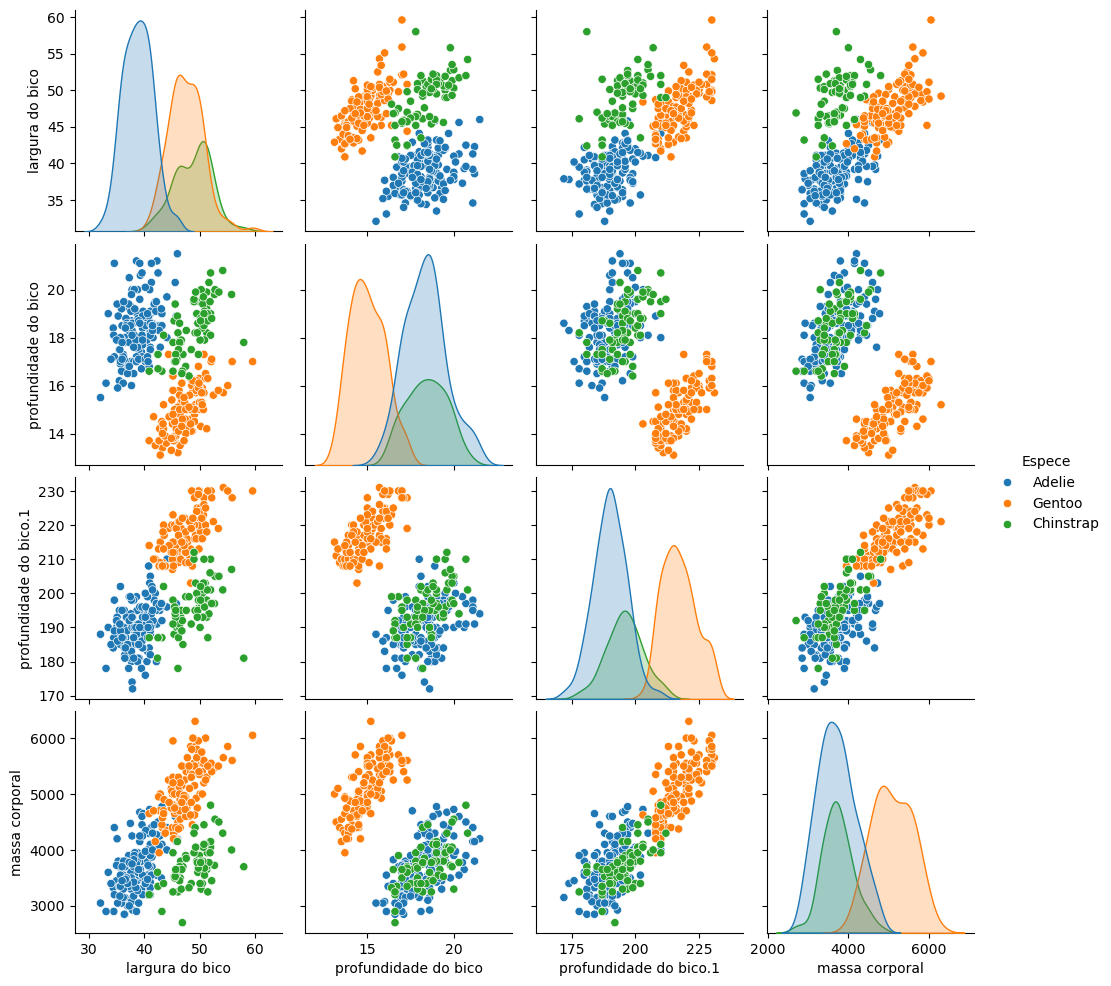

In [6]:
# Pairplot para explorar relações entre medidas e espécies
sns.pairplot(tabela, hue='Espece')
plt.show()

In [19]:
#ajuste

from sklearn.preprocessing import LabelEncoder

# Instanciar o LabelEncoder
le = LabelEncoder()

# Transformar as colunas categóricas 'ilha' e 'sexo' em numéricas
tabela['Ilha'] = le.fit_transform(tabela['Ilha'])
tabela['sexo'] = le.fit_transform(tabela['sexo'])

tabela.head()


,Espece,Ilha,largura do bico,profundidade do bico,profundidade do bico.1,massa corporal,sexo
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


In [20]:
#Dividir o dataset em conjuntos de treinamento e teste:

from sklearn.model_selection import train_test_split

# Separar as features (X) e o target (y)
X = tabela.drop('Espece', axis=1) #parametros para analisar e conseguir classificar espece
y = tabela['Espece'] #quero classificar especie

# Dividir os dados em 80% para treinamento e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Instanciar o modelo
model = RandomForestClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
# avaliar modelo

from sklearn.metrics import accuracy_score, classification_report

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a precisão
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Exibir o relatório de classificação
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.9850746268656716
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        31
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.99        67
weighted avg       0.99      0.99      0.98        67



In [23]:
# validar se ha overfitting
from sklearn.model_selection import cross_val_score

# Avaliar o modelo usando validação cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [1.         0.98507463 0.97014925 1.         0.98484848]
Mean cross-validation score: 0.9880144730891001
